In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PowerTransdormer, PolynomialFeatures
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('ames iowa housing.csv', index_col=0)

ImportError: cannot import name 'PowerTransdormer' from 'sklearn.preprocessing' (C:\Users\Wiktor\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [40]:
#overall information about data        
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   float64
 6   LotShape       1460 non-null   float64
 7   LandContour    1460 non-null   float64
 8   Utilities      1460 non-null   float64
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   float64
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [41]:
#First step, filling nan values
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['Alley'] = df['Alley'].fillna(0)
df['BsmtQual'] = df['BsmtQual'].fillna(0)
df['BsmtCond'] = df['BsmtCond'].fillna(0)
df['BsmtExposure'] = df['BsmtExposure'].fillna(0)
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(0)
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(0)
df['BsmtExposure'] = df['BsmtExposure'].fillna(0)
df['FireplaceQu'] = df['FireplaceQu'].fillna(0)
df['PoolQC'] = df['PoolQC'].fillna(0)
df['Fence'] = df['Fence'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna(0)
df['GarageQual'] = df['GarageQual'].fillna(0)
df['GarageCond'] = df['GarageCond'].fillna(0)

k = df['GarageYrBlt'].mode()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(k[0])

k = df['Electrical'].mode()
df['Electrical'] = df['Electrical'].fillna(k[0])

k = df['MasVnrType'].mode()
df['MasVnrType'] = df['MasVnrType'].fillna(k[0])

k = df['MasVnrArea'].mode()
df['MasVnrArea'] = df['MasVnrArea'].fillna(k[0])


In [42]:
#Second step, encoding properly data
df['Alley'] = df['Alley'].replace({'Grvl': 0.5, 'Pave': 1})
df['BsmtQual'] = df['BsmtQual'].replace({'Po': 0.2, 'Fa': 0.4, 'TA': 0.6, 'Gd': 0.8, 'Ex': 1})
df['BsmtCond'] = df['BsmtCond'].replace({'Po': 0.2, 'Fa': 0.4, 'TA': 0.6, 'Gd': 0.8, 'Ex': 1})
df['BsmtExposure'] = df['BsmtExposure'].replace({'No': 0, 'Mn': 0.33, 'Av': 0.66, 'Gd': 1})
df['BsmtFinType1'] = df['BsmtFinType1'].replace({'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df['BsmtFinType2'] = df['BsmtFinType2'].replace({'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df['FireplaceQu'] = df['FireplaceQu'].replace({'Po': 0.2, 'Fa': 0.4, 'TA': 0.6, 'Gd': 0.8, 'Ex': 1})
df['PoolQC'] = df['PoolQC'].replace({'Fa': 0.25, 'TA': 0.5, 'Gd': 0.75, 'Ex': 1})
df['Fence'] = df['Fence'].replace({'MnWw': 0.25, 'GdWo': 0.5, 'MnPrv': 0.75, 'GdPrv': 1})
df['LotShape'] = df['LotShape'].replace({'IR3': 0.25, 'IR2': 0.5, 'IR1': 0.75, 'Reg': 1})
df['HeatingQC'] = df['HeatingQC'].replace({'Po': 0, 'Fa': 0.25, 'TA': 0.5, 'Gd': 0.75, 'Ex': 1})
df['KitchenQual'] = df['KitchenQual'].replace({'Po': 0, 'Fa': 0.25, 'TA': 0.5, 'Gd': 0.75, 'Ex': 1})
df['GarageQual'] = df['GarageQual'].replace({'Po': 0.2, 'Fa': 0.4, 'TA': 0.6, 'Gd': 0.8, 'Ex': 1})
df['GarageCond'] = df['GarageCond'].replace({'Po': 0.2, 'Fa': 0.4, 'TA': 0.6, 'Gd': 0.8, 'Ex': 1})


df['Street'] = df['Street'].replace({'Grvl': 0, 'Pave': 1})
df['ExterQual'] = df['ExterQual'].replace({'Po': 0, 'Fa': 0.25, 'TA': 0.5, 'Gd': 0.75, 'Ex': 1})
df['CentralAir'] = df['CentralAir'].replace({'N': 0, 'Y': 1})       
df['ExterCond'] = df['ExterCond'].replace({'Po': 0, 'Fa': 0.25, 'TA': 0.5, 'Gd': 0.75, 'Ex': 1})
df['LandContour'] = df['LandContour'].replace({'Low': 0, 'HLS': 0.33, 'Bnk': 0.66, 'Lvl': 1})
df['Utilities'] = df['Utilities'].replace({'ELO': 0, 'NoSeWa': 0.33, 'NoSewr': 0.66, 'AllPub': 1})
df['LandSlope'] = df['LandSlope'].replace({'Sev': 0, 'Mod': 0.5, 'Gtl': 1})
df['Electrical'] = df['Electrical'].replace({'FuseP': 0, 'FuseF': 0.33, 'FuseA': 0.66, 'SBrkr': 1})
df['Functional'] = df['Functional'].replace({'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ':7})
df['PavedDrive'] = df['PavedDrive'].replace({'N': 0, 'P': 0.5, 'Y': 1})
df['GarageFinish'] = df['GarageFinish'].replace({'Unf': 0.33, 'Rfn': 0.66, 'Fin': 1})


TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [43]:
#Tym sposobem dostajemy 219 kolumn
pd.get_dummies(df['GarageType'], dummy_na=True, drop_first=True).columns

KeyError: 'GarageType'

In [44]:
#wyrzucic te komorke?
k = pd.get_dummies(df['GarageType'],drop_first=True, dummy_na=True)
k.columns = k.columns.fillna('NoGarage')
df[k.columns] = k
df = df.drop(['GarageType'], axis=1)

k = pd.get_dummies(df['MiscFeature'],drop_first=True, dummy_na=True)
k.columns = k.columns.fillna('NoFeature')
df[k.columns] = k
df = df.drop(['MiscFeature'], axis=1)

KeyError: 'GarageType'

In [45]:
X = pd.get_dummies(df.drop(['SalePrice'], axis = 1), dummy_na=True, drop_first=True)
y = df['SalePrice']
print(X.shape)

(1460, 219)


In [46]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=3)

In [47]:
y_train_sd = y_train.values.reshape(-1,1)
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train_sd)
X_train_sd = scalerX.transform(X_train)
y_train_sd = scalery.transform(y_train_sd)
X_test_sd = scalerX.transform(X_test)

In [48]:
#for simplicity I define function for regression
def reg_model(model, X_train, X_test, y_train):
    if model == 'linear':
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
    elif model =='ridge':
        tR = np.linspace(1,200,200)
        parameters = {'alpha': tR}
        model = Ridge()
        Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)
        Ridge_reg.fit(X_train, y_train)
        y_pred = Ridge_reg.predict(X_test)
        y_pred = scalery.inverse_transform(y_pred)
        print(Ridge_reg.best_estimator_)
    else:
        tL = [0.001, 0.01, 0.1, 1, 10]
        parameters = {'alpha': tL}
        model = Lasso()
        Lasso_reg = GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)
        Lasso_reg.fit(X_train, y_train)
        y_pred = Lasso_reg.predict(X_test)
        y_pred = scalery.inverse_transform(y_pred)
        print(Lasso_reg.best_estimator_)
    
    return y_pred

In [49]:
#automatically generate summarization
def summary(y_pred, y_test):
    t1 = np.linspace(1, len(y_pred), len(y_pred))
    res = y_test-y_pred
    q1 = res.quantile(0.99)
    q2 = res.quantile(0.01)
    res2 = res[(res < q1) & (res > q2)]
    y_test2 = y_test[(res < q1) & (res > q2)]
    y_pred2 = y_pred[(res < q1) & (res > q2)]
    t2 = np.linspace(1, len(res2), len(res2))

    fig, axs = plt.subplots(2, 2,figsize=(12.5,12.5))
    axs[0, 0].scatter(y_pred, y_test)
    axs[0, 0].set_xlabel('Predicted prices')
    axs[0, 0].set_ylabel('Real prices')
    axs[0, 0].set_title('Prices comparison, extreme values incl.')
    axs[0, 1].scatter(y_pred2, y_test2)
    axs[0, 1].set_xlabel('Predicted prices')
    axs[0, 1].set_title('Prices comparison, extreme values deleted')
    axs[1, 0].scatter(t1, res)
    axs[1, 0].set_ylabel('Difference between predicted and real')
    axs[1, 0].set_title('Residuals, extreme values incl.')
    axs[1, 1].scatter(t2, res2)
    axs[1, 1].set_title('Residuals, extreme values deleted')
    print('r2 score for y_pred and y_test: ', r2_score(y_pred, y_test))
    print('r2 score for y_pred and y_test after deleting extreme values: ', r2_score(y_pred2, y_test2))
    print('kstest for residuals: ', stats.kstest(res, 'norm'))
    print('kstest for residuals after deleting extreme values: ', stats.kstest(res2, 'norm'))
    print('Mean relative error in %: ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

This is summary for Multiple Linear Regression including all features
r2 score for y_pred and y_test:  0.6617947917034639
r2 score for y_pred and y_test after deleting extreme values:  0.8977704406782896
kstest for residuals:  KstestResult(statistic=0.5159817351598174, pvalue=7.333210255948976e-109)
kstest for residuals after deleting extreme values:  KstestResult(statistic=0.5163551401869159, pvalue=1.491171821117975e-106)
Mean relative error in %:  12.650857741727517


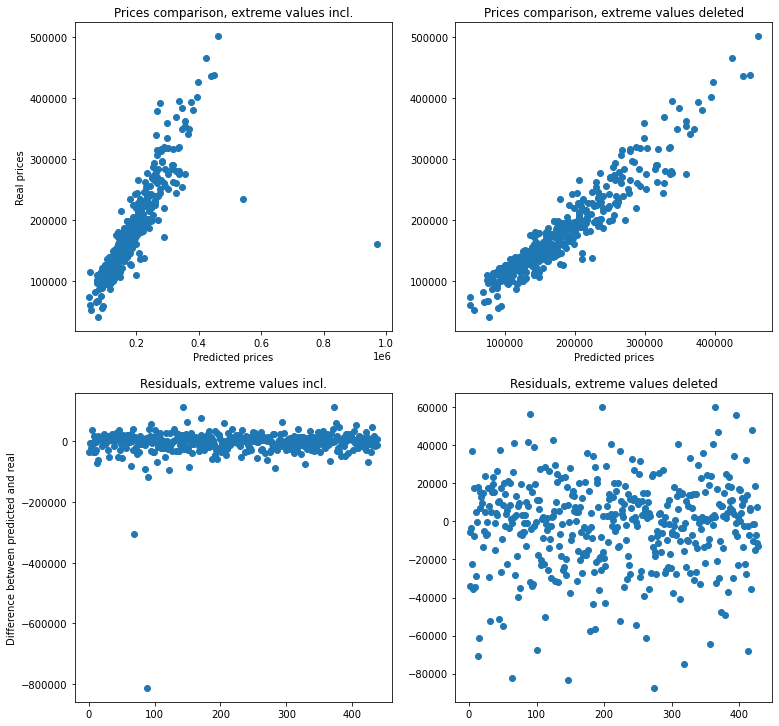

In [50]:
print('This is summary for Multiple Linear Regression including all features')
y_pred = reg_model('linear', X_train, X_test, y_train)
summary(y_pred, y_test)

In [33]:
#Wystepuja wartosci niesoknczone oraz NA, co to oznacza?
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

#Ponizej 10 jest ok, 

C:\Users\Wiktor\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Wiktor\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                   feature        VIF
0               MSSubClass  32.361176
1              LotFrontage   1.661032
2                  LotArea   2.151311
3                   Street   1.504085
4                    Alley   1.747682
..                     ...        ...
214   SaleCondition_Alloca   1.614554
215   SaleCondition_Family   1.378208
216   SaleCondition_Normal   3.358699
217  SaleCondition_Partial  46.428645
218      SaleCondition_nan        NaN

[219 rows x 2 columns]


In [34]:
print(vif_data['VIF'].to_string())

0      3.236118e+01
1      1.661032e+00
2      2.151311e+00
3      1.504085e+00
4      1.747682e+00
5      1.750681e+00
6      2.145284e+00
7      1.315945e+00
8      2.496243e+00
9      5.197530e+00
10     2.462646e+00
11     1.397621e+01
12     3.468511e+00
13     2.938514e+00
14     3.932160e+00
15     1.497250e+00
16     5.969845e+00
17     3.718787e+00
18     2.104659e+00
19     3.114535e+00
20              inf
21     3.510491e+00
22              inf
23              inf
24              inf
25     2.301259e+00
26     2.449492e+00
27              inf
28              inf
29              inf
30              inf
31     2.781036e+00
32     1.397496e+00
33     3.984112e+00
34     2.995406e+00
35     3.265174e+00
36     4.152740e+00
37     3.217102e+00
38     6.391190e+00
39     1.539358e+00
40     5.540586e+00
41     5.676603e+00
42     6.194820e+00
43     7.752383e+00
44     7.717917e+00
45     2.049331e+01
46     2.114908e+01
47     1.834514e+00
48     1.461081e+00
49     1.557714e+00


In [183]:
#This funcion does feature selection with AIC 
def backward_step(X,y):

    k = len(X.columns)
    lr = LinearRegression()
    n = np.size(y)
    lr.fit(X, y)
    y3 = lr.predict(X)
    aic_full = (n * np.log(1 / n * np.sum((y - y3) ** 2)) + 2 * k)
    
    while 1:
        aic = []
        if len(X.columns) > 2:
            for i in range(k):
                lr.fit(X.drop(X.columns[i],axis=1), y)
                y1 = lr.predict(X.drop(X.columns[i],axis=1))
                aic.append(n*np.log(1/n*np.sum((y-y1)**2)) + 2 * (k-1))
        else:
            for i in range(k):
                lr.fit(X.drop(X.columns[i], axis=1).values.reshape(-1, 1), y)
                y1 = lr.predict(X.drop(X.columns[i], axis=1).values.reshape(-1, 1))
                aic.append(n * np.log(1 / n * np.sum((y - y1) ** 2)) + 2 * (k-1))

        lr.fit(X, y)
        y3 = lr.predict(X)
        aic.append(n * np.log(1 / n * np.sum((y - y3) ** 2)) + 2 * k)
        aic_min = min(aic)
        r = aic.index(aic_min)

        if aic[-1] == min(aic):
            break

        k = k-1
        X = X.drop(X.columns[r],axis=1)
        t = X.columns
    
    return col_names_AIC

In [269]:
#Notice that backward step selection will take time, since there are 200 features
col_names_AIC = backward_step(X_train, y_train)
X_train_AIC = X_train[col_names_AIC]
X_test_AIC = X_test[col_names_AIC]
y_pred_AIC = reg_model('linear', X_train_AIC, X_test_AIC, y_train)

This is summary for Multiple Linear Regression excluding features with Akaike criterion
r2 score for y_pred and y_test:  0.6629093422615786
r2 score for y_pred and y_test after deleting extreme values:  0.9002097112530542
kstest for residuals:  KstestResult(statistic=0.5136986301369864, pvalue=7.854850439610085e-108)
kstest for residuals after deleting extreme values:  KstestResult(statistic=0.514018691588785, pvalue=1.6006849155564871e-105)


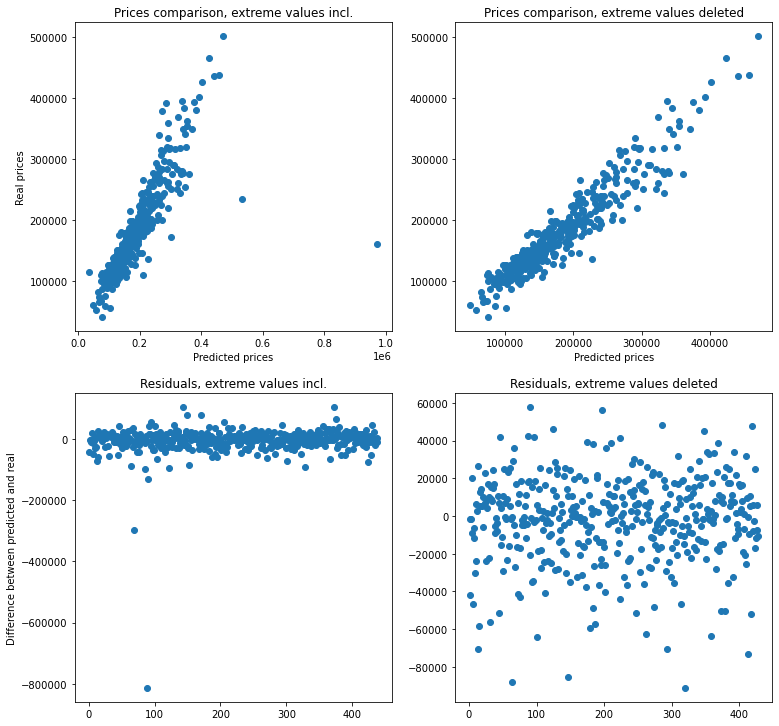

In [270]:
print('This is summary for Multiple Linear Regression excluding features with Akaike criterion')
summary(y_pred_AIC, y_test)

In [51]:
print('This is summary for Ridge Regression for all features')
y_pred = reg_model('ridge', X_train_sd, X_test_sd, y_train_sd)
summary(y_pred, y_test)

This is summary for Ridge Regression for all features
Ridge(alpha=184.0)


Exception: Data must be 1-dimensional

This is summary for Lasso Regression for all features
Lasso(alpha=0.01)
r2 score for y_pred and y_test:  0.6876455128160439
r2 score for y_pred and y_test after deleting extreme values:  0.90830456280891
kstest for residuals:  KstestResult(statistic=0.5, pvalue=8.850805320891851e-102)
kstest for residuals after deleting extreme values:  KstestResult(statistic=0.5, pvalue=1.8143620005556328e-99)
Mean relative error in %:  11.11812733633141


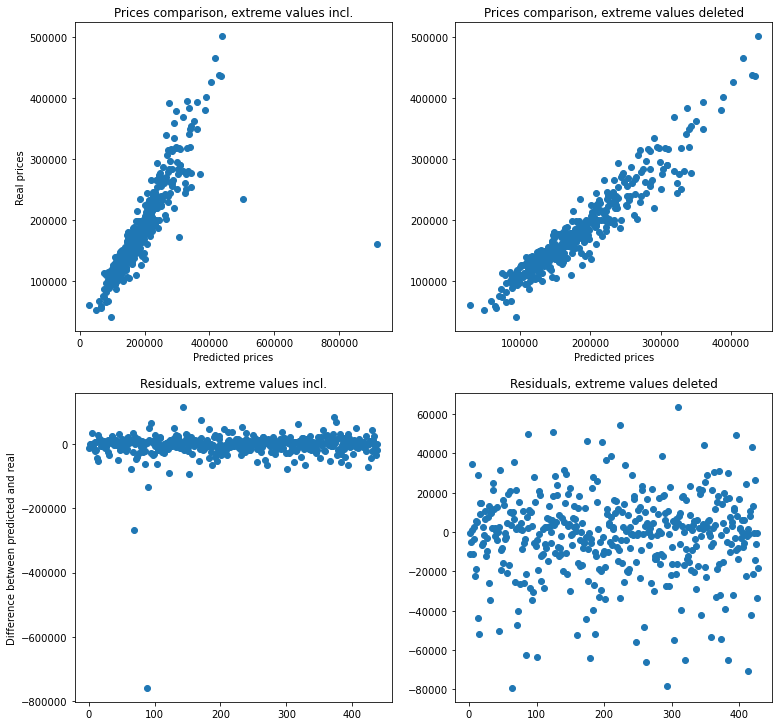

In [54]:
print('This is summary for Lasso Regression for all features')
y_pred = reg_model('lasso', X_train_sd, X_test_sd, y_train_sd)
summary(y_pred, y_test)

This is summary for Multiple Linear Regression on transformed prices(log(y))
r2 score for y_pred and y_test:  0.24200227478198388
r2 score for y_pred and y_test after deleting extreme values:  0.9338017198230723
kstest for residuals:  KstestResult(statistic=0.502283105022831, pvalue=8.981448860190382e-103)
kstest for residuals after deleting extreme values:  KstestResult(statistic=0.5023364485981309, pvalue=1.8408269248839306e-100)
Mean relative error in %:  11.928314253998424


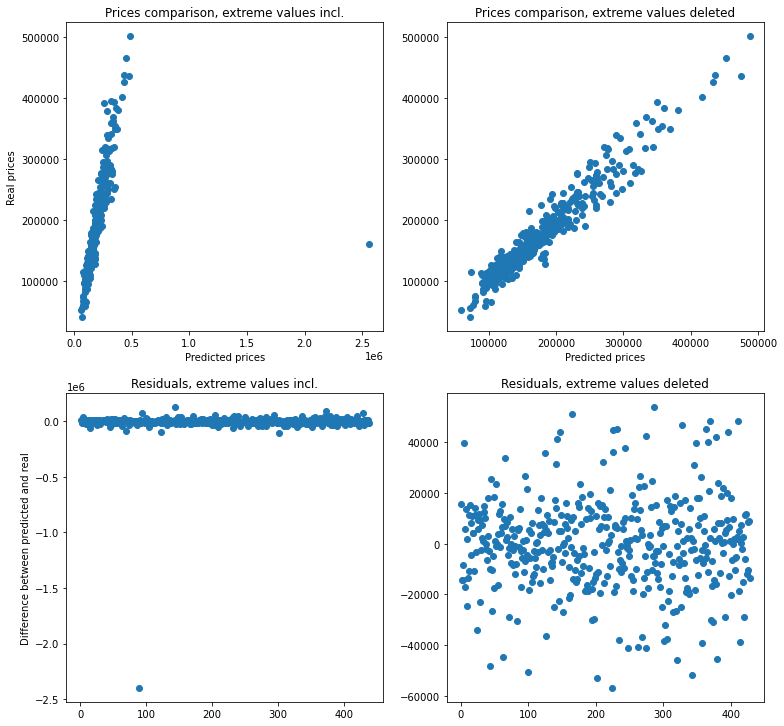

In [55]:
#Transforming y to log(y), logarithmic prices
print('This is summary for Multiple Linear Regression on transformed prices(log(y))')
y_train_log = np.log(y_train)
y_pred = reg_model('linear', X_train, X_test, y_train_log)
summary(np.exp(y_pred), y_test)

This is summary for Multiple Linear Regression on transformed prices(sqrt(y))
r2 score for y_pred and y_test:  0.5719613606351776
r2 score for y_pred and y_test after deleting extreme values:  0.9263810144686517
kstest for residuals:  KstestResult(statistic=0.5, pvalue=8.850805320891851e-102)
kstest for residuals after deleting extreme values:  KstestResult(statistic=0.5, pvalue=1.8143620005556328e-99)
Mean relative error in %:  10.660668221656422


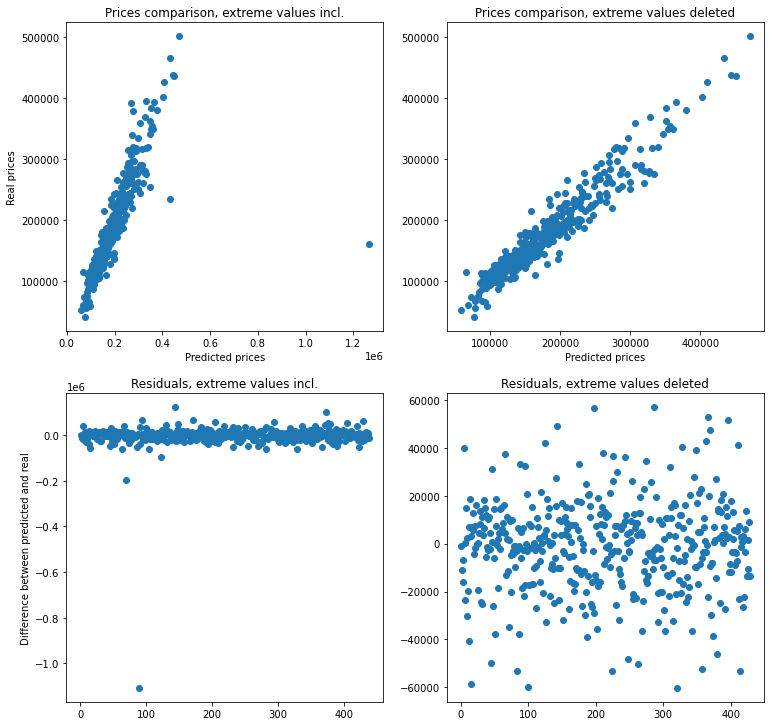

In [56]:
#Transforming y to sqrt(y)
print('This is summary for Multiple Linear Regression on transformed prices(sqrt(y))')
y_train_sqrt = np.sqrt(y_train)
y_pred = reg_model('linear', X_train, X_test, y_train_sqrt)
summary(y_pred ** 2, y_test)

In [57]:
#Box-Cox transformation to make data more Gaussian-like 
pt = PowerTransformer()
pt.fit(y_train.values.reshape(-1,1))
y_train_pt = pt.transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))
y_pred = reg_model('linear', X_train, X_test, y_train_pt)
print('This is summary for Multiple Linear Regression on transformed prices(Box-Cox(y))')
summary(y_pred, y_test_pt)

This is summary for Multiple Linear Regression on transformed prices(Box-Cox(y))


AttributeError: 'numpy.ndarray' object has no attribute 'quantile'

In [58]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

This is summary for Multiple Linear Regression on polynomial features
r2 score for y_pred and y_test:  0.014160364163206873
r2 score for y_pred and y_test after deleting extreme values:  0.4461359202207372
kstest for residuals:  KstestResult(statistic=0.5136986301369864, pvalue=7.854850439610085e-108)
kstest for residuals after deleting extreme values:  KstestResult(statistic=0.514018691588785, pvalue=1.6006849155564871e-105)
Mean relative error in %:  42.934351216786204


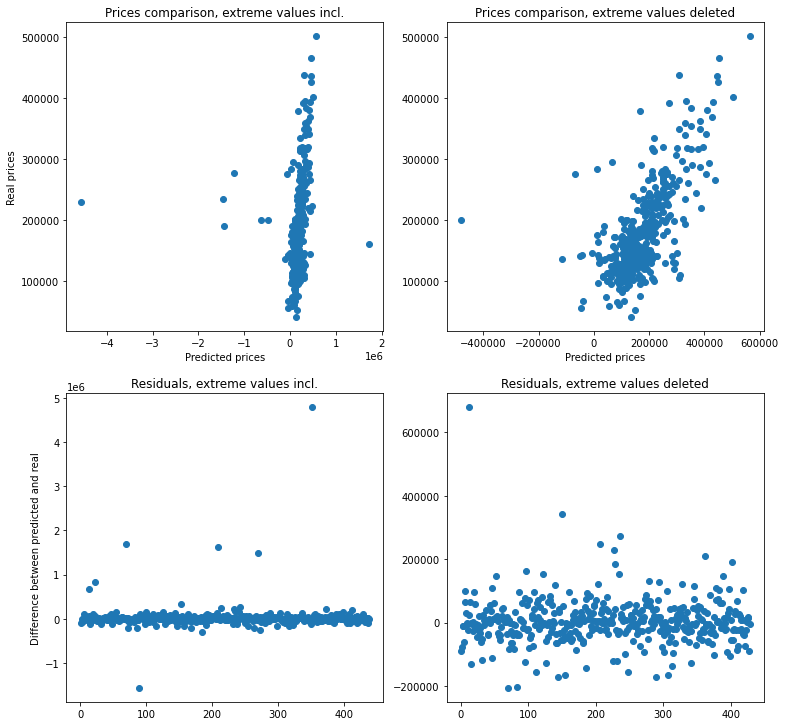

In [59]:
y_pred = reg_model('linear', X_train_poly, X_test_poly, y_train)
print('This is summary for Multiple Linear Regression on polynomial features')
summary(y_pred, y_test)